# Самолеты

* Построить список уникальных типов самолетов, зарегистрированных в России
* Какой тип самолета имеет самую раннюю дату выдчи сертификата
* Построить запрос: Владелец Аэропорта, Аэропорт, Пассажиропоток суммарный за 2018, грузопоток суммарный за 2018
* Перечислить аэропорты, где пассажиропоток меньше медианы, а грузопоток больше медианы
* Перечислить авиакомпании у которых нет типов воздушных судов зарегистрированных в России
* Выведите список: Месяц, суммарный пассажиропоток за данный месяц, аэропорт, в котором пассажиропоток в данном месяце максимальный
* Вывести список: тип аэропорта, средний грузопоток в месяц в аэропортах данного типа

In [1]:
import numpy as np
import pandas as pd

In [2]:
aircraft_df = pd.read_csv('./aircraft.csv', encoding='utf-8', sep=';', parse_dates=['дата действующего свидетельства о регистрации'])

In [3]:
airlines_df = pd.read_csv('./airlines.csv', encoding='utf-8')

In [4]:
airports_df = pd.read_csv('./airports.csv', encoding='utf-8')

In [5]:
passenger_transport_df = pd.read_csv('./passenger transportation.csv', encoding='utf-8', sep=';')

In [475]:
cargo_transport_df = pd.read_csv('./cargo transportation.csv', encoding='utf-8', sep=';')

In [7]:
aircraft_df.head()

,Вид воздушного судна,Тип (наименование) воздушного судна,Опознавательные знаки,Серийный №,Идентификац. №,номер свидетельства о регистрации,дата действующего свидетельства о регистрации
0,самолет,Птенец-2,RA-0001A,NaN,ЕЭВС.03.1529,0001,2012-11-03
1,дельталет,Аватар,RA-0002A,NaN,ЕЭВС.03.1709,0002,2012-03-16
2,самолет,С-2 Елочка,RA-0002G,NaN,ЕЭВС.02.0126,0224,2006-02-06
3,дельталет,СОКОЛ,RA-0003A,NaN,ЕЭВС.03.1708,0003,2012-03-16
4,самолет,Небесный,RA-0003G,NaN,ЕЭВС.02.0013,0225,2008-07-04


In [8]:
aircraft_df.isnull().any()

Вид воздушного судна                             False
Тип (наименование) воздушного судна              False
Опознавательные знаки                            False
Серийный №                                        True
Идентификац. №                                    True
номер свидетельства о регистрации                False
дата действующего свидетельства о регистрации    False
dtype: bool

In [9]:
airlines_df.head()

,Индекс,Название,Юридическое Название,Самолеты
551,Абакан Эир,Общество с ограниченной ответственностью «АБАК...,Абакан,"Ил-76 (7), Ми-26 (3), Ми-8 (3), Ми-8МТВ (5)"
481,Авиа Менеджмент Груп,Акционерное общество «Авиа Менеджмент Груп»,Иваново (Южный),Pilatus PC-12 (10)
554,Авиакомпания «Лайт Эйр»,Закрытое акционерное общество Авиакомпания «Ла...,Уфа,"BK-117 (1), Robinson R-44 (17), Ан-2 (7), R..."
284,Авиакомпания СОКОЛ,Закрытое акционерное общество Авиакомпания «С...,Новотитаровская-Азимут,"Ми-2 (1), Ми-8 (1)"
442,Авиакон Цитотранс,Открытое акционерное общество Авиакомпания «А...,Екатеринбург(Кольцово),Ил-76 (5)


In [10]:
airlines_df.isnull().any()

Индекс                  False
Название                False
Юридическое Название     True
Самолеты                 True
dtype: bool

In [11]:
airports_df.head()

,Наименование аэропорта РФ,Свидетельство,Юрлицо,Тип
0,Архангельск (Талаги),"Сертификат МАК № 061А-М, 27.09.2013-03.08.2018...",ОАО «Аэропорт Архангельск»,В
1,"Нарьян-Мар В 3 км восточнее г.Нарьян-Мар, НАО",Свидетельство о государственной регистрации и ...,ОАО «Нарьян-Марский объединенный авиаотряд»,В
2,"Васьково 12 км юго-западнее г.Архангельск, Ар...",Свидетельство о государственной регистрации и ...,ОАО «2-ой Архангельский объединенный авиаотряд»,Г
3,"Котлас 3 км юго-восточнее г.Котлас, Архангель...",Свидетельство о государственной регистрации и ...,ОАО «Аэросервис»,Г
4,"Лешуконское 1,3 км юго-западнее села Лешуконс...",Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Лешуконское»,Г


In [12]:
airports_df.isnull().any()

Наименование аэропорта РФ     True
Свидетельство                False
Юрлицо                       False
Тип                          False
dtype: bool

In [471]:
cargo_transport_df.head()

,Наименование аэропорта РФ,Год периода данных,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Январь - Декабрь
0,Абакан,2018,"63,39","60,98","69,46","88,62","83,81","64,99","49,64","70,26","87,35",NaN,NaN,NaN,NaN
1,Айхал,2018,***,***,***,***,***,***,***,***,***,NaN,NaN,NaN,NaN
2,Алдан,2018,***,***,***,***,***,***,***,***,***,NaN,NaN,NaN,NaN
3,Амдерма,2018,***,***,***,***,***,***,***,***,***,NaN,NaN,NaN,NaN
4,Анадырь,2018,"112,58","267,65","221,77","331,37","160,45","89,77","109,29","95,99","103,77",NaN,NaN,NaN,NaN


In [14]:
cargo_transport_df.isnull().any()

Наименование аэропорта РФ    False
Год периода данных           False
Январь                       False
Февраль                      False
Март                         False
Апрель                       False
Май                          False
Июнь                         False
Июль                         False
Август                       False
Сентябрь                     False
Октябрь                       True
Ноябрь                        True
Декабрь                       True
Январь - Декабрь              True
dtype: bool

In [473]:
passenger_transport_df.head()

,Наименование аэропорта РФ,Год периода данных,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Январь - Декабрь
0,Абакан,2018,11 851,10 504,11 591,12 323,14 314,19 935,25 213,25 507,19 295,NaN,NaN,NaN,NaN
1,Айхал,2018,***,***,***,***,***,***,***,***,***,NaN,NaN,NaN,NaN
2,Алдан,2018,***,***,***,***,***,***,***,***,***,NaN,NaN,NaN,NaN
3,Амдерма,2018,***,***,***,***,***,***,***,***,***,NaN,NaN,NaN,NaN
4,Анадырь,2018,5 128,4 447,5 456,7 650,8 364,10 563,13 402,13 751,10 065,NaN,NaN,NaN,NaN


In [16]:
passenger_transport_df.isnull().any()

Наименование аэропорта РФ    False
Год периода данных           False
Январь                       False
Февраль                      False
Март                         False
Апрель                       False
Май                          False
Июнь                         False
Июль                         False
Август                       False
Сентябрь                     False
Октябрь                       True
Ноябрь                        True
Декабрь                       True
Январь - Декабрь              True
dtype: bool

##  Список уникальных типов самолетов, зарегистрированных в России

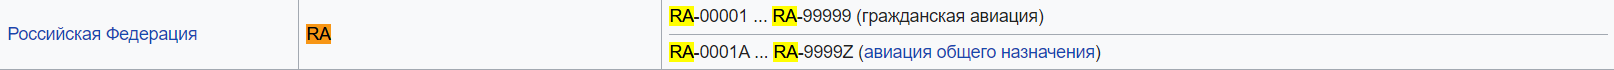

In [17]:
unique_aircrafts_df = aircraft_df.loc[aircraft_df['Опознавательные знаки'].str.startswith('RA'), ['Вид воздушного судна', 'Тип (наименование) воздушного судна']]

In [18]:
unique_aircrafts_df = unique_aircrafts_df[unique_aircrafts_df['Вид воздушного судна'] == 'самолет']

In [19]:
unique_aircrafts_series = pd.Series(unique_aircrafts_df['Тип (наименование) воздушного судна'].unique())
unique_aircrafts_series

0                   Птенец-2
1                 С-2 Елочка
2                   Небесный
3                    Светлый
4                       Сура
5                   EUROSTAR
6                Pioneer 330
7                   СП-30З О
8                     Саргон
9               Аэропракт-20
10                    Ястреб
11              Рейнджер МПВ
12               Икарус С42В
13               С22В Икарус
14            Авиатика-890СХ
15              С-2УТ Синтал
16            Х-32-912УТ Гор
17             Peregrrine SL
18               EuroStar SL
19              EuroStar SLW
20                    СП-34М
21                   Саванна
22               FK-9 Mark-3
23                     Z-602
24                    А-27МС
25                Дельфин-10
26           АС-5М Альбатрос
27                    Вимана
28            Аэропракт-22L2
29        Авиатика-МАИ-890СХ
                ...         
1823                   Ан-74
1824            Ан-74ТК-100С
1825                  Ан-74Д
1826          

## Какой тип самолета имеет самую раннюю дату выдчи сертификата

In [20]:
early_type_df = aircraft_df.loc[aircraft_df['дата действующего свидетельства о регистрации'].index.min(), ['Тип (наименование) воздушного судна']]

In [21]:
early_type_df

Тип (наименование) воздушного судна    Птенец-2
Name: 0, dtype: object

## Построить запрос: Владелец Аэропорта, Аэропорт, Пассажиропоток суммарный за 2018, грузопоток суммарный за 2018

In [22]:
airports_df['Наименование аэропорта РФ'] = airports_df.loc[:, 'Наименование аэропорта РФ'].str.split(' ').str[0]

In [23]:
cargo_transport_2018_df = cargo_transport_df[cargo_transport_df['Год периода данных'] == 2018]
passenger_transport_2018_df = passenger_transport_df[passenger_transport_df['Год периода данных'] == 2018]
query_cargo_airports_df = pd.merge(airports_df, cargo_transport_2018_df)
query_passenger_airports_df = pd.merge(airports_df, passenger_transport_2018_df)

In [24]:
query_cargo_airports_df = query_cargo_airports_df.drop(['Октябрь', 'Ноябрь', 'Декабрь', 'Январь - Декабрь'], axis=1)
query_passenger_airports_df = query_passenger_airports_df.drop(['Октябрь', 'Ноябрь', 'Декабрь', 'Январь - Декабрь'], axis=1)

In [25]:
query_cargo_airports_df = query_cargo_airports_df[query_cargo_airports_df['Январь'] != '***']
query_cargo_airports_df

,Наименование аэропорта РФ,Свидетельство,Юрлицо,Тип,Год периода данных,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь
21,Мурманск,Сертификат МАК № 006 А-М 22.12.2011 12.10.2016,ОАО «Аэропорт Мурманск»,В,2018,"109,49","129,69","141,71","225,06","145,39","122,1","126,54","140,94","146,58"
23,Сыктывкар,Сертификат МАК № 051 А-М 29.05.2013 02.06.2018,ОАО «Комиавиатранс»,В,2018,"43,97","42,12","47,6","49,62","52,85","70,88","61,02","54,11","46,91"
24,Воркута,Сертификат Росавиации № АД 0007 10.07.2014 ...,ОАО «Комиавиатранс»,В,2018,"4,44","3,15","4,5","3,67","4,9","5,69","12,85","12,6","12,3"
29,Иркутск,Сертификат МАК № 054 А-М 10.07.2014 15.07.2019,ОАО «Международный Аэропорт Иркутск»,Б,2018,"537,06","585,51","664,3","708,59","805,66","744,31","723,36","760,25","765,28"
40,Белоярский,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Белоярский»,В,2018,"6,5","3,9","6,5","9,6","11,7","4,9",7,"9,2","4,2"
43,Когалым,Свидетельство о государственной регистрации и ...,ООО «Международный аэропорт Когалым»,В,2018,"48,4","73,64","11,99","9,99","4,9","3,97","7,02","10,15","7,66"
45,Надым,Сертификат Росавиации № АД 0008 16.07.2014 1...,ОАО «Надымское авиапредприятие»,Б,2018,"22,93","25,43","31,29","31,45","34,2","26,61","30,46","27,74","36,64"
46,Нижневартовск,Сертификат МАК № 072 А-М 11.12.2012 11.12.2017,ОАО «Нижневартовскавиа»,Б,2018,"225,2","320,5","333,1","334,2","334,8","210,4","148,8","144,8","171,4"
47,Ноябрьск,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Сургут»,В,2018,"32,72","51,8","50,8","53,19","51,55","51,18","46,47","46,47","50,87"
55,Ямбург,Свидетельство о государственной регистрации и ...,ООО АП «Газпром авиа»,В,2018,0,"0,1","0,01","1,29","0,02","0,2","0,01","0,03",0


In [26]:
query_passenger_airports_df = query_passenger_airports_df[query_passenger_airports_df['Январь'] != '***']
query_passenger_airports_df

,Наименование аэропорта РФ,Свидетельство,Юрлицо,Тип,Год периода данных,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь
21,Мурманск,Сертификат МАК № 006 А-М 22.12.2011 12.10.2016,ОАО «Аэропорт Мурманск»,В,2018,67 783,67 398,68 931,67 860,76 468,82 918,96 476,97 551,88 007
23,Сыктывкар,Сертификат МАК № 051 А-М 29.05.2013 02.06.2018,ОАО «Комиавиатранс»,В,2018,32 540,32 292,35 647,37 544,47 196,62 944,72 843,68 460,57 317
24,Воркута,Сертификат Росавиации № АД 0007 10.07.2014 ...,ОАО «Комиавиатранс»,В,2018,1 416,1 337,1 661,1 500,1 812,2 141,2 450,3 046,2 264
29,Иркутск,Сертификат МАК № 054 А-М 10.07.2014 15.07.2019,ОАО «Международный Аэропорт Иркутск»,Б,2018,137 330,135 018,149 885,147 448,161 482,192 665,250 391,259 892,213 076
40,Белоярский,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Белоярский»,В,2018,3 646,3 274,4 105,5 537,6 834,6 816,6 928,7 319,5 832
43,Когалым,Свидетельство о государственной регистрации и ...,ООО «Международный аэропорт Когалым»,В,2018,10 534,10 077,10 534,10 285,12 145,12 366,12 900,13 160,12 387
45,Надым,Сертификат Росавиации № АД 0008 16.07.2014 1...,ОАО «Надымское авиапредприятие»,Б,2018,12 886,11 591,12 973,14 763,16 507,18 037,17 486,17 662,16 975
46,Нижневартовск,Сертификат МАК № 072 А-М 11.12.2012 11.12.2017,ОАО «Нижневартовскавиа»,Б,2018,43 657,40 470,45 373,45 185,47 367,61 994,70 960,74 714,66 139
47,Ноябрьск,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Сургут»,В,2018,14 100,12 686,14 582,15 616,16 461,18 010,19 365,18 497,16 729
55,Ямбург,Свидетельство о государственной регистрации и ...,ООО АП «Газпром авиа»,В,2018,5 572,5 640,5 170,5 515,4 973,4 841,4 201,4 849,5 067


In [27]:
query_passenger_airports_df.loc[:,'Январь':'Сентябрь'] = query_passenger_airports_df.loc[:,'Январь':'Сентябрь'].apply(lambda x: x.str.replace(' ', '').astype(int))
query_passenger_airports_df

,Наименование аэропорта РФ,Свидетельство,Юрлицо,Тип,Год периода данных,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь
21,Мурманск,Сертификат МАК № 006 А-М 22.12.2011 12.10.2016,ОАО «Аэропорт Мурманск»,В,2018,67783,67398,68931,67860,76468,82918,96476,97551,88007
23,Сыктывкар,Сертификат МАК № 051 А-М 29.05.2013 02.06.2018,ОАО «Комиавиатранс»,В,2018,32540,32292,35647,37544,47196,62944,72843,68460,57317
24,Воркута,Сертификат Росавиации № АД 0007 10.07.2014 ...,ОАО «Комиавиатранс»,В,2018,1416,1337,1661,1500,1812,2141,2450,3046,2264
29,Иркутск,Сертификат МАК № 054 А-М 10.07.2014 15.07.2019,ОАО «Международный Аэропорт Иркутск»,Б,2018,137330,135018,149885,147448,161482,192665,250391,259892,213076
40,Белоярский,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Белоярский»,В,2018,3646,3274,4105,5537,6834,6816,6928,7319,5832
43,Когалым,Свидетельство о государственной регистрации и ...,ООО «Международный аэропорт Когалым»,В,2018,10534,10077,10534,10285,12145,12366,12900,13160,12387
45,Надым,Сертификат Росавиации № АД 0008 16.07.2014 1...,ОАО «Надымское авиапредприятие»,Б,2018,12886,11591,12973,14763,16507,18037,17486,17662,16975
46,Нижневартовск,Сертификат МАК № 072 А-М 11.12.2012 11.12.2017,ОАО «Нижневартовскавиа»,Б,2018,43657,40470,45373,45185,47367,61994,70960,74714,66139
47,Ноябрьск,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Сургут»,В,2018,14100,12686,14582,15616,16461,18010,19365,18497,16729
55,Ямбург,Свидетельство о государственной регистрации и ...,ООО АП «Газпром авиа»,В,2018,5572,5640,5170,5515,4973,4841,4201,4849,5067


### Суммарный пассажиропоток

In [28]:
query_passenger_airports_df['Суммарный поток'] = query_passenger_airports_df.loc[:,'Январь':'Сентябрь'].sum(axis=1)
query_passenger_airports_df

,Наименование аэропорта РФ,Свидетельство,Юрлицо,Тип,Год периода данных,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Суммарный поток
21,Мурманск,Сертификат МАК № 006 А-М 22.12.2011 12.10.2016,ОАО «Аэропорт Мурманск»,В,2018,67783,67398,68931,67860,76468,82918,96476,97551,88007,713392
23,Сыктывкар,Сертификат МАК № 051 А-М 29.05.2013 02.06.2018,ОАО «Комиавиатранс»,В,2018,32540,32292,35647,37544,47196,62944,72843,68460,57317,446783
24,Воркута,Сертификат Росавиации № АД 0007 10.07.2014 ...,ОАО «Комиавиатранс»,В,2018,1416,1337,1661,1500,1812,2141,2450,3046,2264,17627
29,Иркутск,Сертификат МАК № 054 А-М 10.07.2014 15.07.2019,ОАО «Международный Аэропорт Иркутск»,Б,2018,137330,135018,149885,147448,161482,192665,250391,259892,213076,1647187
40,Белоярский,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Белоярский»,В,2018,3646,3274,4105,5537,6834,6816,6928,7319,5832,50291
43,Когалым,Свидетельство о государственной регистрации и ...,ООО «Международный аэропорт Когалым»,В,2018,10534,10077,10534,10285,12145,12366,12900,13160,12387,104388
45,Надым,Сертификат Росавиации № АД 0008 16.07.2014 1...,ОАО «Надымское авиапредприятие»,Б,2018,12886,11591,12973,14763,16507,18037,17486,17662,16975,138880
46,Нижневартовск,Сертификат МАК № 072 А-М 11.12.2012 11.12.2017,ОАО «Нижневартовскавиа»,Б,2018,43657,40470,45373,45185,47367,61994,70960,74714,66139,495859
47,Ноябрьск,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Сургут»,В,2018,14100,12686,14582,15616,16461,18010,19365,18497,16729,146046
55,Ямбург,Свидетельство о государственной регистрации и ...,ООО АП «Газпром авиа»,В,2018,5572,5640,5170,5515,4973,4841,4201,4849,5067,45828


### Суммарный грузопоток

In [29]:
query_cargo_airports_df.loc[:,'Январь':'Сентябрь'] = query_cargo_airports_df.loc[:,'Январь':'Сентябрь'].apply(lambda x: x.str.replace(',', '.').astype(float))
query_cargo_airports_df['Суммарный поток'] = query_cargo_airports_df.loc[:,'Январь':'Сентябрь'].sum(axis=1)
query_cargo_airports_df

,Наименование аэропорта РФ,Свидетельство,Юрлицо,Тип,Год периода данных,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Суммарный поток
21,Мурманск,Сертификат МАК № 006 А-М 22.12.2011 12.10.2016,ОАО «Аэропорт Мурманск»,В,2018,109.49,129.69,141.71,225.06,145.39,122.10,126.54,140.94,146.58,1287.50
23,Сыктывкар,Сертификат МАК № 051 А-М 29.05.2013 02.06.2018,ОАО «Комиавиатранс»,В,2018,43.97,42.12,47.60,49.62,52.85,70.88,61.02,54.11,46.91,469.08
24,Воркута,Сертификат Росавиации № АД 0007 10.07.2014 ...,ОАО «Комиавиатранс»,В,2018,4.44,3.15,4.50,3.67,4.90,5.69,12.85,12.60,12.30,64.10
29,Иркутск,Сертификат МАК № 054 А-М 10.07.2014 15.07.2019,ОАО «Международный Аэропорт Иркутск»,Б,2018,537.06,585.51,664.30,708.59,805.66,744.31,723.36,760.25,765.28,6294.32
40,Белоярский,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Белоярский»,В,2018,6.50,3.90,6.50,9.60,11.70,4.90,7.00,9.20,4.20,63.50
43,Когалым,Свидетельство о государственной регистрации и ...,ООО «Международный аэропорт Когалым»,В,2018,48.40,73.64,11.99,9.99,4.90,3.97,7.02,10.15,7.66,177.72
45,Надым,Сертификат Росавиации № АД 0008 16.07.2014 1...,ОАО «Надымское авиапредприятие»,Б,2018,22.93,25.43,31.29,31.45,34.20,26.61,30.46,27.74,36.64,266.75
46,Нижневартовск,Сертификат МАК № 072 А-М 11.12.2012 11.12.2017,ОАО «Нижневартовскавиа»,Б,2018,225.20,320.50,333.10,334.20,334.80,210.40,148.80,144.80,171.40,2223.20
47,Ноябрьск,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Сургут»,В,2018,32.72,51.80,50.80,53.19,51.55,51.18,46.47,46.47,50.87,435.05
55,Ямбург,Свидетельство о государственной регистрации и ...,ООО АП «Газпром авиа»,В,2018,0.00,0.10,0.01,1.29,0.02,0.20,0.01,0.03,0.00,1.66


## Перечислить аэропорты, где пассажиропоток меньше медианы, а грузопоток больше медианы

In [30]:
query_cargo_airports_df['Медиана'] = query_cargo_airports_df.loc[:, 'Январь':'Сентябрь'].median(axis=1)
query_cargo_airports_df

,Наименование аэропорта РФ,Свидетельство,Юрлицо,Тип,Год периода данных,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Суммарный поток,Медиана
21,Мурманск,Сертификат МАК № 006 А-М 22.12.2011 12.10.2016,ОАО «Аэропорт Мурманск»,В,2018,109.49,129.69,141.71,225.06,145.39,122.10,126.54,140.94,146.58,1287.50,140.94
23,Сыктывкар,Сертификат МАК № 051 А-М 29.05.2013 02.06.2018,ОАО «Комиавиатранс»,В,2018,43.97,42.12,47.60,49.62,52.85,70.88,61.02,54.11,46.91,469.08,49.62
24,Воркута,Сертификат Росавиации № АД 0007 10.07.2014 ...,ОАО «Комиавиатранс»,В,2018,4.44,3.15,4.50,3.67,4.90,5.69,12.85,12.60,12.30,64.10,4.90
29,Иркутск,Сертификат МАК № 054 А-М 10.07.2014 15.07.2019,ОАО «Международный Аэропорт Иркутск»,Б,2018,537.06,585.51,664.30,708.59,805.66,744.31,723.36,760.25,765.28,6294.32,723.36
40,Белоярский,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Белоярский»,В,2018,6.50,3.90,6.50,9.60,11.70,4.90,7.00,9.20,4.20,63.50,6.50
43,Когалым,Свидетельство о государственной регистрации и ...,ООО «Международный аэропорт Когалым»,В,2018,48.40,73.64,11.99,9.99,4.90,3.97,7.02,10.15,7.66,177.72,9.99
45,Надым,Сертификат Росавиации № АД 0008 16.07.2014 1...,ОАО «Надымское авиапредприятие»,Б,2018,22.93,25.43,31.29,31.45,34.20,26.61,30.46,27.74,36.64,266.75,30.46
46,Нижневартовск,Сертификат МАК № 072 А-М 11.12.2012 11.12.2017,ОАО «Нижневартовскавиа»,Б,2018,225.20,320.50,333.10,334.20,334.80,210.40,148.80,144.80,171.40,2223.20,225.20
47,Ноябрьск,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Сургут»,В,2018,32.72,51.80,50.80,53.19,51.55,51.18,46.47,46.47,50.87,435.05,50.87
55,Ямбург,Свидетельство о государственной регистрации и ...,ООО АП «Газпром авиа»,В,2018,0.00,0.10,0.01,1.29,0.02,0.20,0.01,0.03,0.00,1.66,0.02


In [31]:
query_passenger_airports_df['Медиана'] = query_passenger_airports_df.loc[:, 'Январь':'Сентябрь'].median(axis=1)
query_passenger_airports_df

,Наименование аэропорта РФ,Свидетельство,Юрлицо,Тип,Год периода данных,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Суммарный поток,Медиана
21,Мурманск,Сертификат МАК № 006 А-М 22.12.2011 12.10.2016,ОАО «Аэропорт Мурманск»,В,2018,67783,67398,68931,67860,76468,82918,96476,97551,88007,713392,76468.0
23,Сыктывкар,Сертификат МАК № 051 А-М 29.05.2013 02.06.2018,ОАО «Комиавиатранс»,В,2018,32540,32292,35647,37544,47196,62944,72843,68460,57317,446783,47196.0
24,Воркута,Сертификат Росавиации № АД 0007 10.07.2014 ...,ОАО «Комиавиатранс»,В,2018,1416,1337,1661,1500,1812,2141,2450,3046,2264,17627,1812.0
29,Иркутск,Сертификат МАК № 054 А-М 10.07.2014 15.07.2019,ОАО «Международный Аэропорт Иркутск»,Б,2018,137330,135018,149885,147448,161482,192665,250391,259892,213076,1647187,161482.0
40,Белоярский,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Белоярский»,В,2018,3646,3274,4105,5537,6834,6816,6928,7319,5832,50291,5832.0
43,Когалым,Свидетельство о государственной регистрации и ...,ООО «Международный аэропорт Когалым»,В,2018,10534,10077,10534,10285,12145,12366,12900,13160,12387,104388,12145.0
45,Надым,Сертификат Росавиации № АД 0008 16.07.2014 1...,ОАО «Надымское авиапредприятие»,Б,2018,12886,11591,12973,14763,16507,18037,17486,17662,16975,138880,16507.0
46,Нижневартовск,Сертификат МАК № 072 А-М 11.12.2012 11.12.2017,ОАО «Нижневартовскавиа»,Б,2018,43657,40470,45373,45185,47367,61994,70960,74714,66139,495859,47367.0
47,Ноябрьск,Свидетельство о государственной регистрации и ...,ОАО «Аэропорт Сургут»,В,2018,14100,12686,14582,15616,16461,18010,19365,18497,16729,146046,16461.0
55,Ямбург,Свидетельство о государственной регистрации и ...,ООО АП «Газпром авиа»,В,2018,5572,5640,5170,5515,4973,4841,4201,4849,5067,45828,5067.0


## Пассажиропоток меньше медианы

In [32]:
query_passenger_airports_df.loc[query_passenger_airports_df['Суммарный поток'] < query_passenger_airports_df['Медиана'],  ['Наименование аэропорта РФ', 'Суммарный поток', 'Медиана']]

,Наименование аэропорта РФ,Суммарный поток,Медиана


#### Грузопоток больше медианы

In [33]:
query_cargo_airports_df.loc[query_cargo_airports_df['Суммарный поток'] > query_cargo_airports_df['Медиана'], ['Наименование аэропорта РФ', 'Суммарный поток', 'Медиана']]

,Наименование аэропорта РФ,Суммарный поток,Медиана
21,Мурманск,1287.50,140.94
23,Сыктывкар,469.08,49.62
24,Воркута,64.10,4.90
29,Иркутск,6294.32,723.36
40,Белоярский,63.50,6.50
43,Когалым,177.72,9.99
45,Надым,266.75,30.46
46,Нижневартовск,2223.20,225.20
47,Ноябрьск,435.05,50.87
55,Ямбург,1.66,0.02


## Перечислите авиакомпании у которых нет типов воздушных судов зарегистрированных в России

In [34]:
import re

In [35]:
airlines_df = airlines_df.dropna()

In [36]:
airlines_df['Самолеты'] = airlines_df['Самолеты'].str.split(',').apply(lambda x: list(map(lambda y: re.sub(r"\(.*\)", "", y).replace(" ", ""), x)))
airlines_df

,Индекс,Название,Юридическое Название,Самолеты
551,Абакан Эир,Общество с ограниченной ответственностью «АБАК...,Абакан,"[Ил-76, Ми-26, Ми-8, Ми-8МТВ]"
481,Авиа Менеджмент Груп,Акционерное общество «Авиа Менеджмент Груп»,Иваново (Южный),[PilatusPC-12]
554,Авиакомпания «Лайт Эйр»,Закрытое акционерное общество Авиакомпания «Ла...,Уфа,"[BK-117, RobinsonR-44, Ан-2, R66]"
284,Авиакомпания СОКОЛ,Закрытое акционерное общество Авиакомпания «С...,Новотитаровская-Азимут,"[Ми-2, Ми-8]"
442,Авиакон Цитотранс,Открытое акционерное общество Авиакомпания «А...,Екатеринбург(Кольцово),[Ил-76]
120,Авиалифт Владивосток,Закрытое акционерное общество «Авиалифт Владив...,Владивосток(Кневичи),[Ка-32]
560,Авиасервис (Казань) (ИНН 1624446694),Общество с ограниченной ответственностью «Авиа...,Бугульма Казань,"[Challenger600, CL-600-2B19, Falcon7X, Ми-8МТВ]"
458,Авиастар-ТУ,Общество с ограниченной ответственностью Авиа...,Москва (Домодедово) Москва (Шереметьево) Рам...,[Ту-204]
9,Авиашельф,ЗАО совместное предприятие «Авиационная компан...,Ноглики Оха (Новостройка) Южно-Сахалинск (Хо...,"[Ми-8, Ми-8МТВ]"
486,Аврора,Открытое акционерное общество «Авиакомпания «А...,Владивосток(Кневичи) Южно-Сахалинск (Хомутово),"[A-319, B-737, DHC-6, DHC-8]"


In [108]:
russian_df = aircraft_df.loc[aircraft_df['Опознавательные знаки'].str.startswith('RA'), ['Тип (наименование) воздушного судна']]['Тип (наименование) воздушного судна']
airlines_df.loc[~(airlines_df['Самолеты'].apply(lambda x : pd.Series(x).isin(russian_df).any())), ['Название', 'Самолеты']]

,Название,Самолеты
481,Акционерное общество «Авиа Менеджмент Груп»,[PilatusPC-12]
486,Открытое акционерное общество «Авиакомпания «А...,"[A-319, B-737, DHC-6, DHC-8]"
533,ООО «Ай Флай»,"[A-330, B-757]"
499,Общество с ограниченной ответственностью «АТРАН»,[B-737]
505,Общество с ограниченной ответственностью «Аэро...,"[BAe-125-800, HS-125-700]"
1,ОАО «Аэрофлот - российские авиалинии»,"[A-319, A-320, A-321, A-330, B-737, RRJ-95, B-..."
451,Общество с ограниченной ответственностью «Ави...,"[A-319, B-757]"
491,ОАО «Джет Эйр Групп»,"[EMB-135, GulfstreamG-IV, HS-125-700]"
89,Открытое акционерное общество «ДОНАВИА»,[A-319]
36,Общество с ограниченной ответственностью «Авиа...,[B-767]


## Вывести список: Месяц, суммарный пассажиропоток за данный месяц, аэропорт, в котором пассажиропоток в данном месяце максимальный

In [429]:
month_airports_df = passenger_transport_df.drop(['Год периода данных'], axis=1)
month_airports_df = month_airports_df.replace('***', None)
month_airports_df = month_airports_df.fillna('0')
month_airports_df.loc[:,'Январь':'Январь - Декабрь'] = month_airports_df.loc[:,'Январь':'Январь - Декабрь'].apply(lambda x: x.str.replace(' ', '').astype(int))
display(month_airports_df)

,Наименование аэропорта РФ,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Январь - Декабрь
0,Абакан,11851,10504,11591,12323,14314,19935,25213,25507,19295,0,0,0,0
1,Айхал,11851,10504,11591,12323,14314,19935,25213,25507,19295,0,0,0,0
2,Алдан,11851,10504,11591,12323,14314,19935,25213,25507,19295,0,0,0,0
3,Амдерма,11851,10504,11591,12323,14314,19935,25213,25507,19295,0,0,0,0
4,Анадырь,5128,4447,5456,7650,8364,10563,13402,13751,10065,0,0,0,0
5,Анапа(Витязево),40338,32232,32232,56658,94249,219472,294101,311263,207505,0,0,0,0
6,Апатиты(Хибины),40338,32232,32232,56658,94249,219472,294101,311263,207505,0,0,0,0
7,Архангельск(Васьково),40338,32232,32232,56658,94249,219472,294101,311263,207505,0,0,0,0
8,Архангельск(Талаги),61727,56015,65240,67853,80438,97057,107634,107201,89288,0,0,0,0
9,Астрахань(Нариманово),39578,37537,42383,50028,56043,46546,56329,59163,62552,0,0,0,0


In [461]:
#month_airports_df = 
def max_passengers_per_month(month):
    return month_airports_df.loc[month_airports_df[month] == month_airports_df[month].max(), ['Наименование аэропорта РФ', month]]

max_passengers_per_month('Декабрь')

,Наименование аэропорта РФ,Декабрь
388,Москва(Шереметьево),3113933
389,Мотыгино,3113933


## Вывести список: тип аэропорта, средний грузопоток в месяц в аэропортах данного типа

In [570]:
type_median_df = cargo_transport_df
type_median_df = type_median_df.replace('***', None)
type_median_df = type_median_df.fillna('0.0')
type_median_df.loc[:,'Январь':'Январь - Декабрь'] = type_median_df.loc[:,'Январь':'Январь - Декабрь'].apply(lambda x: x.str.replace(' ', ''))
type_median_df.loc[:,'Январь':'Январь - Декабрь'] = type_median_df.loc[:,'Январь':'Январь - Декабрь'].apply(lambda x: x.str.replace(',', '.'))
type_median_df.loc[:,'Январь':'Январь - Декабрь'] = type_median_df.loc[:,'Январь':'Январь - Декабрь'].apply(lambda x: x.astype(float))
type_median_df = pd.merge(airports_df, type_median_df, how='inner').drop(['Свидетельство', 'Юрлицо'], axis=1)
type_median_df['Средний грузопоток'] = type_median_df.loc[:, 'Январь':'Январь - Декабрь'].mean(axis=1)
type_median_df

,Наименование аэропорта РФ,Тип,Год периода данных,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Январь - Декабрь,Средний грузопоток
0,Нарьян-Мар,В,2018,22.93,25.43,31.29,31.45,34.20,26.61,30.46,27.74,36.64,0.00,0.00,0.00,0.00,20.519231
1,Нарьян-Мар,В,2017,21.96,21.47,31.93,28.03,31.63,36.16,33.35,33.34,36.78,27.13,30.08,41.18,373.04,57.390769
2,Нарьян-Мар,В,2016,15.72,21.34,25.56,32.00,35.42,25.10,33.45,26.86,34.33,32.69,27.73,36.74,346.94,53.375385
3,Нарьян-Мар,В,2015,21.32,27.09,35.09,35.81,64.76,49.01,30.75,42.52,29.39,34.48,34.16,38.45,442.83,68.127692
4,Нарьян-Мар,В,2014,30.73,36.49,41.79,46.93,63.73,49.64,38.71,42.56,42.99,66.48,46.11,56.58,562.74,86.575385
5,Нарьян-Мар,В,2013,39.73,48.72,45.74,45.81,63.03,47.28,37.37,48.26,48.86,71.08,55.38,61.47,612.73,94.266154
6,Нарьян-Мар,В,2012,37.51,49.72,56.88,54.11,66.40,64.11,47.09,50.40,54.71,65.90,79.79,65.29,691.91,106.447692
7,Нарьян-Мар,В,2011,51.12,46.82,49.90,63.82,64.33,63.01,58.99,56.70,53.21,71.89,63.84,67.73,711.36,109.440000
8,Нарьян-Мар,В,2010,47.41,59.08,72.73,61.81,80.41,52.28,49.32,52.21,62.56,69.81,76.25,68.65,752.52,115.772308
9,Нарьян-Мар,В,2009,41.55,53.51,58.43,50.99,69.68,74.04,57.48,60.73,69.86,76.62,76.21,78.74,767.84,118.129231


In [571]:
def median_type(type_a):
    return type_median_df.loc[type_median_df['Тип'] == type_a, ['Тип', 'Средний грузопоток']].mean()

In [574]:
median_type('Е')

Средний грузопоток    1410.535066
dtype: float64